In [27]:
# import libraries
import numpy as np
import pandas as pd
import geopandas as gpd
import geoplot.crs as gcrs
import geoplot as gplt
import matplotlib.pyplot as plt
import seaborn as sns
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import mapclassify as mc


In [2]:
# read in files
storm_df = pd.read_csv("Resources/storms.csv")
#storm_df.tail()

In [3]:
florida_2019_df = pd.read_csv('Resources/Florida_2019_all_counties.csv')
florida_2020_df = pd.read_csv('Resources/Florida_2020_all_counties.csv')
florida_2021_df = pd.read_csv('Resources/Florida_2021_all_counties.csv')

#florida_2019_df

In [4]:
flood_df = pd.read_csv('Resources/nfip-flood-policies.csv')
#flood_df.head()

C:\Users\antoi\AppData\Local\Temp\ipykernel_15320\3959475226.py:1: DtypeWarning: Columns (41) have mixed types. Specify dtype option on import or set low_memory=False.
  flood_df = pd.read_csv('Resources/nfip-flood-policies.csv')


In [5]:
storm_df['status'].unique()

array(['tropical depression', 'tropical storm', 'extratropical',
       'hurricane', 'subtropical storm', 'subtropical depression',
       'disturbance', 'other low', 'tropical wave'], dtype=object)

In [6]:
#Extract only hurricane data from the storm dataframe
hurricane = storm_df.loc[storm_df['status'] == 'hurricane']
hurricane.set_index('year', inplace = True)

In [7]:
#Extract years of interest and save as sepearte dataframe
hurricane_2017_2021 = hurricane.loc[[2017, 2018 , 2019, 2020, 2021]]
hurricane_2017_2021.head()

,Unnamed: 0,name,month,day,hour,lat,long,status,category,wind,pressure,tropicalstorm_force_diameter,hurricane_force_diameter
year,,,,,,,,,,,,,
2017,16027,Franklin,8,9,18,20.2,-94.4,hurricane,1.0,65,984,210.0,30.0
2017,16028,Franklin,8,10,0,20.3,-95.5,hurricane,1.0,75,981,220.0,30.0
2017,16029,Franklin,8,10,5,20.0,-96.6,hurricane,1.0,70,990,220.0,30.0
2017,16045,Gert,8,15,6,31.5,-72.3,hurricane,1.0,65,986,140.0,20.0
2017,16046,Gert,8,15,12,32.3,-72.1,hurricane,1.0,70,982,150.0,20.0


In [8]:
#Drop unneeded columns
hurricane_2017_2021.drop(columns=['Unnamed: 0','status'], inplace=True)
hurricane_2017_2021

,name,month,day,hour,lat,long,category,wind,pressure,tropicalstorm_force_diameter,hurricane_force_diameter
year,,,,,,,,,,,
2017,Franklin,8,9,18,20.2,-94.4,1.0,65,984,210.0,30.0
2017,Franklin,8,10,0,20.3,-95.5,1.0,75,981,220.0,30.0
2017,Franklin,8,10,5,20.0,-96.6,1.0,70,990,220.0,30.0
2017,Gert,8,15,6,31.5,-72.3,1.0,65,986,140.0,20.0
2017,Gert,8,15,12,32.3,-72.1,1.0,70,982,150.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...
2021,Sam,10,4,0,38.7,-52.2,2.0,90,957,420.0,100.0
2021,Sam,10,4,6,39.9,-49.9,2.0,90,957,440.0,60.0
2021,Sam,10,4,12,41.4,-47.1,2.0,85,960,440.0,60.0


In [9]:
hurricane_2017_2021 = hurricane_2017_2021.reset_index()


In [10]:
hurricane_2017_2021.groupby(by = ['year','month'])[['name']].nunique('name')

name
year month      
2017 8         4
     9         5
     10        2
2018 7         2
     9         3
     10        3
2019 7         1
     8         1
     9         4
     10        2
2020 7         2
     8         3
     9         4
     10        4
     11        2
2021 7         1
     8         3
     9         3
     10        1

In [11]:
hurricane_2017_2021['date'] = pd.to_datetime(hurricane_2017_2021[['year','month','day']])
hurricane_2017_2021

,year,name,month,day,hour,lat,long,category,wind,pressure,tropicalstorm_force_diameter,hurricane_force_diameter,date
0,2017,Franklin,8,9,18,20.2,-94.4,1.0,65,984,210.0,30.0,2017-08-09
1,2017,Franklin,8,10,0,20.3,-95.5,1.0,75,981,220.0,30.0,2017-08-10
2,2017,Franklin,8,10,5,20.0,-96.6,1.0,70,990,220.0,30.0,2017-08-10
3,2017,Gert,8,15,6,31.5,-72.3,1.0,65,986,140.0,20.0,2017-08-15
4,2017,Gert,8,15,12,32.3,-72.1,1.0,70,982,150.0,20.0,2017-08-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
702,2021,Sam,10,4,0,38.7,-52.2,2.0,90,957,420.0,100.0,2021-10-04
703,2021,Sam,10,4,6,39.9,-49.9,2.0,90,957,440.0,60.0,2021-10-04
704,2021,Sam,10,4,12,41.4,-47.1,2.0,85,960,440.0,60.0,2021-10-04
705,2021,Sam,10,4,18,43.8,-43.6,1.0,80,965,500.0,70.0,2021-10-04


In [12]:
clean_2019 = florida_2019_df.drop(florida_2019_df.tail(4).index)
clean_2019.drop(florida_2019_df.head(3).index, inplace=True)
clean_2020 = florida_2020_df.drop(florida_2020_df.tail(4).index)
clean_2020.drop(florida_2020_df.head(3).index, inplace=True)
clean_2021 = florida_2021_df.drop(florida_2021_df.tail(4).index)
clean_2021.drop(florida_2021_df.head(3).index, inplace=True)
clean_2021

,CAGDP1 County and MSA gross domestic product (GDP) summary,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
3,12001,"Alachua, FL",1,Real GDP (thousands of chained 2017 dollars),6.7
4,12001,"Alachua, FL",2,Chain-type quantity indexes for real GDP,6.7
5,12001,"Alachua, FL",3,Current-dollar GDP (thousands of current dollars),10.2
6,12003,"Baker, FL",1,Real GDP (thousands of chained 2017 dollars),4.4
7,12003,"Baker, FL",2,Chain-type quantity indexes for real GDP,4.4
...,...,...,...,...,...
199,12131,"Walton, FL",2,Chain-type quantity indexes for real GDP,16.6
200,12131,"Walton, FL",3,Current-dollar GDP (thousands of current dollars),21.2
201,12133,"Washington, FL",1,Real GDP (thousands of chained 2017 dollars),4.9
202,12133,"Washington, FL",2,Chain-type quantity indexes for real GDP,4.9


In [13]:
gdp_rows_2019 = clean_2019[clean_2019['Unnamed: 3'].str.contains('Real GDP \(thousands of chained 2017 dollars\)')]
gdp_rows_2020 = clean_2020[clean_2020['Unnamed: 3'].str.contains('Real GDP \(thousands of chained 2017 dollars\)')]
gdp_rows_2021 = clean_2021[clean_2021['Unnamed: 3'].str.contains('Real GDP \(thousands of chained 2017 dollars\)')]
gdp_rows_2019.columns = ['Index' , 'County', 'rand','Title','Value']
gdp_rows_2020.columns = ['Index' , 'County', 'rand','Title','Value']
gdp_rows_2021.columns = ['Index' , 'County', 'rand','Title','Value']
gdp_rows_2019.drop(columns=['Title','rand', 'Index'], inplace=True)
gdp_rows_2020.drop(columns=['Title','rand', 'Index'], inplace=True)
gdp_rows_2021.drop(columns=['Title','rand', 'Index'], inplace=True)
display(gdp_rows_2019.head())
display(gdp_rows_2020.head())
display(gdp_rows_2021.head())

C:\Users\antoi\AppData\Local\Temp\ipykernel_15320\2484456687.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_rows_2019.drop(columns=['Title','rand', 'Index'], inplace=True)
C:\Users\antoi\AppData\Local\Temp\ipykernel_15320\2484456687.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_rows_2020.drop(columns=['Title','rand', 'Index'], inplace=True)
C:\Users\antoi\AppData\Local\Temp\ipykernel_15320\2484456687.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

,County,Value
3,"Alachua, FL",2.7
6,"Baker, FL",0.3
9,"Bay, FL",1
12,"Bradford, FL",-6.8
15,"Brevard, FL",4.4


,County,Value
3,"Alachua, FL",-0.5
6,"Baker, FL",8.2
9,"Bay, FL",1.3
12,"Bradford, FL",5.5
15,"Brevard, FL",0.9


,County,Value
3,"Alachua, FL",6.7
6,"Baker, FL",4.4
9,"Bay, FL",8.3
12,"Bradford, FL",-2
15,"Brevard, FL",9.8


In [14]:
# Merge the dataframes on the County column
merged_df = pd.merge(gdp_rows_2019, gdp_rows_2020, on='County', suffixes=('_2019', '_2020'))
merged_df = pd.merge(merged_df, gdp_rows_2021, on='County')
merged_df['County'] = merged_df['County'].str.split(',').str.get(0)
merged_df

,County,Value_2019,Value_2020,Value
0,Alachua,2.7,-0.5,6.7
1,Baker,0.3,8.2,4.4
2,Bay,1,1.3,8.3
3,Bradford,-6.8,5.5,-2
4,Brevard,4.4,0.9,9.8
...,...,...,...,...
62,Union,-0.8,2.7,6.3
63,Volusia,1.6,0.6,4.9
64,Wakulla,5.1,0.8,6
65,Walton,7.6,2,16.6


In [15]:
merged_df.set_index('County', inplace=True)
merged_df

,Value_2019,Value_2020,Value
County,,,
Alachua,2.7,-0.5,6.7
Baker,0.3,8.2,4.4
Bay,1,1.3,8.3
Bradford,-6.8,5.5,-2
Brevard,4.4,0.9,9.8
...,...,...,...
Union,-0.8,2.7,6.3
Volusia,1.6,0.6,4.9
Wakulla,5.1,0.8,6


<Figure size 1000x600 with 0 Axes>

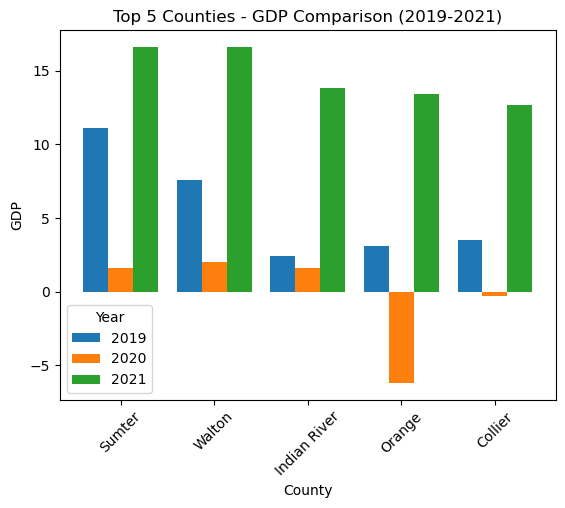

In [16]:
# Convert GDP columns to numeric type
merged_df['Value_2019'] = pd.to_numeric(merged_df['Value_2019'])
merged_df['Value_2020'] = pd.to_numeric(merged_df['Value_2020'])
merged_df['Value'] = pd.to_numeric(merged_df['Value'])


# Sort DataFrame by GDP to get top 5 highest GDP counties
top5_counties = merged_df['Value'].nlargest(5)
top5_counties_data = merged_df.loc[top5_counties.index]

# Plot top 5 highest GDP counties
plt.figure(figsize=(10, 6))
top5_counties_data.plot(kind='bar', width=0.8)
plt.title('Top 5 Counties - GDP Comparison (2019-2021)')
plt.xlabel('County')
plt.ylabel('GDP')
plt.xticks(rotation=45)
legend_labels = ['2019', '2020', '2021']
plt.legend(legend_labels, title='Year')
plt.show()

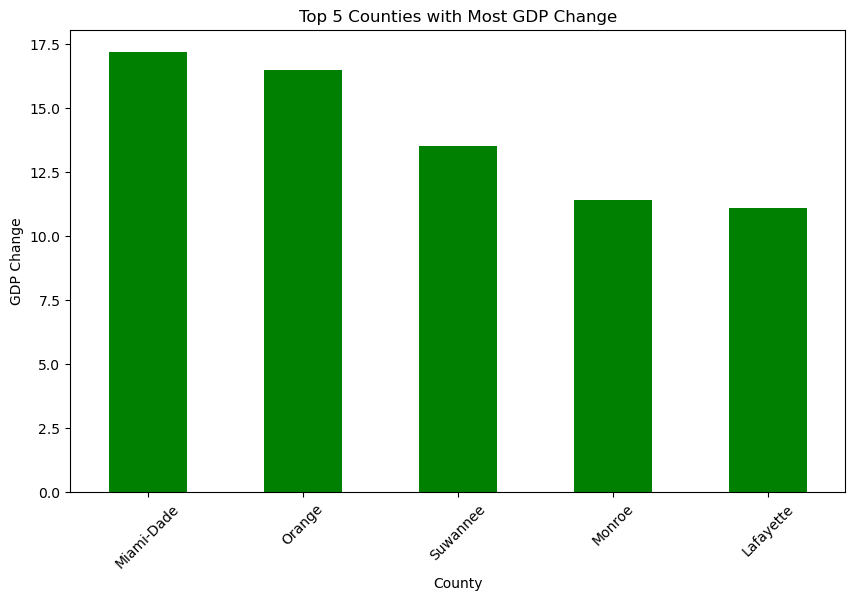

In [17]:
merged_df['GDP_Change'] = merged_df['Value'] - merged_df['Value_2019'] - merged_df['Value_2020']
# Sort DataFrame by GDP change to get top 5 counties with most change
top5_gdp_change_counties = merged_df['GDP_Change'].nlargest(5)

# Plot top 5 counties with most GDP change
plt.figure(figsize=(10, 6))
top5_gdp_change_counties.plot(kind='bar', color='green')
plt.title('Top 5 Counties with Most GDP Change')
plt.xlabel('County')
plt.ylabel('GDP Change')
plt.xticks(rotation=45)
plt.show()

In [18]:
#read data files
fl_1 = pd.read_csv('Resources/Unemployment Data/Florida_Unemployment_1.csv', index_col='DATE',parse_dates=True)
fl_2 = pd.read_csv('Resources/Unemployment Data/Florida_Unemployment_2.csv', index_col='DATE',parse_dates=True)
fl_3 = pd.read_csv('Resources/Unemployment Data/Florida_Unemployment_3.csv', index_col='DATE',parse_dates=True)
fl_4 = pd.read_csv('Resources/Unemployment Data/Florida_Unemployment_4.csv', index_col='DATE',parse_dates=True)
fl_5 = pd.read_csv('Resources/Unemployment Data/Florida_Unemployment_5.csv', index_col='DATE',parse_dates=True)
fl_6 = pd.read_csv('Resources/Unemployment Data/Florida_Unemployment_6.csv', index_col='DATE',parse_dates=True)

#concat files to create Florida Unemployment df
fl_unemployment = pd.concat([fl_1,fl_2,fl_3,fl_4,fl_5,fl_6], axis=1, join='inner')

#rename columns
fl_unemployment.columns = ['Alachua','Baker','Bay','Bradford','Brevard','Broward','Calhoun','Charlotte','Citrus','Clay','Collier','Columbia'
                                ,'DeSoto','Dixie','Duval','Escambia','Flagler','Franklin','Gadsden','Gilchrist','Glades','Gulf','Hamilton','Hardee'
                                ,'Hendry','Hernando','Highlands','Hillsborough','Holmes','Indian River','Jackson','Jefferson','Lafayette','Lake','Lee','Leon'
                                ,'Levy','Liberty','Madison','Manatee','Marion','Martin','Miami-Dade','Monroe','Nassau','Okaloosa','Okeechobee','Orange'
                                ,'Osceola','Palm Beach','Pasco','Pinellas','Polk','Putnam','Santa Rosa','Sarasota','Seminole','St. Johns','St. Lucie','Sumter'
                                ,'Suwawnee','Taylor','Union','Volusia','Wakulla','Walton','Washington' ]

#preview data
display(fl_unemployment.head())
display(fl_unemployment.tail())


,Alachua,Baker,Bay,Bradford,Brevard,Broward,Calhoun,Charlotte,Citrus,Clay,...,St. Johns,St. Lucie,Sumter,Suwawnee,Taylor,Union,Volusia,Wakulla,Walton,Washington
DATE,,,,,,,,,,,,,,,,,,,,,
2019-01-01,3.6,3.8,5.9,3.8,3.8,3.6,5.3,4.3,5.8,3.7,...,3.3,4.6,5.5,4.0,4.4,3.6,4.1,3.5,3.6,4.7
2019-02-01,3.0,3.2,4.8,3.3,3.4,3.2,4.5,3.8,5.1,3.2,...,2.8,4.1,5.0,3.5,3.8,3.0,3.6,2.9,3.1,3.9
2019-03-01,3.0,3.2,4.4,3.3,3.3,3.1,4.3,3.8,4.9,3.1,...,2.8,3.9,5.0,3.5,3.6,3.0,3.5,2.9,3.0,3.6
2019-04-01,2.6,2.9,3.7,2.9,3.0,2.8,3.7,3.4,4.5,2.8,...,2.5,3.6,4.6,3.1,3.4,2.7,3.2,2.7,2.7,3.2
2019-05-01,2.8,3.1,3.7,3.1,3.1,3.0,3.6,3.6,4.8,2.9,...,2.5,3.9,4.7,3.2,3.4,2.8,3.4,2.9,2.7,3.2


,Alachua,Baker,Bay,Bradford,Brevard,Broward,Calhoun,Charlotte,Citrus,Clay,...,St. Johns,St. Lucie,Sumter,Suwawnee,Taylor,Union,Volusia,Wakulla,Walton,Washington
DATE,,,,,,,,,,,,,,,,,,,,,
2021-08-01,4.0,4.0,3.9,4.4,4.2,4.9,4.8,4.8,6.1,3.7,...,3.3,5.2,5.9,4.8,5.2,4.1,4.7,3.5,3.7,4.7
2021-09-01,3.5,3.6,3.5,4.0,3.8,4.5,4.5,4.3,5.4,3.4,...,2.9,4.7,5.3,4.5,4.6,3.6,4.3,3.0,3.4,4.2
2021-10-01,3.4,3.6,3.4,3.8,3.6,4.1,4.5,4.0,5.0,3.2,...,2.8,4.4,4.8,4.2,4.4,3.4,4.1,2.9,3.2,4.0
2021-11-01,3.1,3.3,3.3,3.9,3.5,3.9,4.1,3.9,5.0,3.0,...,2.7,4.2,4.8,3.9,4.4,3.2,3.9,2.8,3.1,3.8
2021-12-01,2.8,2.9,3.1,3.4,3.0,3.3,3.6,3.4,4.4,2.7,...,2.3,3.6,4.2,3.4,4.0,2.7,3.4,2.5,2.7,3.5


In [19]:
fl_unemployment_yearly = fl_unemployment.groupby(fl_unemployment.index.year).mean()
fl_unemployment_yearly.head()

,Alachua,Baker,Bay,Bradford,Brevard,Broward,Calhoun,Charlotte,Citrus,Clay,...,St. Johns,St. Lucie,Sumter,Suwawnee,Taylor,Union,Volusia,Wakulla,Walton,Washington
DATE,,,,,,,,,,,,,,,,,,,,,
2019,3.008333,3.175000,3.808333,3.316667,3.266667,3.10,4.058333,3.766667,4.958333,3.108333,...,2.708333,4.033333,4.808333,3.458333,3.683333,3.058333,3.533333,2.958333,2.933333,3.550000
2020,5.725000,5.341667,6.341667,6.341667,7.041667,9.40,5.450000,7.775000,8.925000,5.708333,...,5.491667,8.191667,8.375000,6.025000,6.741667,5.016667,8.100000,4.750000,6.166667,6.166667
2021,3.833333,3.825000,3.983333,4.275000,4.158333,4.95,4.666667,4.491667,5.800000,3.633333,...,3.125000,5.008333,5.450000,4.625000,5.200000,3.883333,4.708333,3.283333,3.633333,4.600000


In [20]:
#pivot data to then join with gdp dataset
fl_unemployment_yearly = fl_unemployment_yearly.transpose()

#rename index
fl_unemployment_yearly = fl_unemployment_yearly.rename_axis(None,axis=1)


In [21]:
#get column names to verify data transposed as expected
display(fl_unemployment_yearly.keys())
display(fl_unemployment_yearly.head())


Index([2019, 2020, 2021], dtype='int32')

,2019,2020,2021
Alachua,3.008333,5.725000,3.833333
Baker,3.175000,5.341667,3.825000
Bay,3.808333,6.341667,3.983333
Bradford,3.316667,6.341667,4.275000
Brevard,3.266667,7.041667,4.158333


In [23]:
final_merge = pd.merge(merged_df, fl_unemployment_yearly, left_index=True, right_index=True)
final_merge.columns = ['GDP_2019','GDP_2020','GDP_2021','GDP_Change','Unemployment_2019','Unemployment_2020','Unemployment_2021']
final_merge

,GDP_2019,GDP_2020,GDP_2021,GDP_Change,Unemployment_2019,Unemployment_2020,Unemployment_2021
Alachua,2.7,-0.5,6.7,4.5,3.008333,5.725000,3.833333
Baker,0.3,8.2,4.4,-4.1,3.175000,5.341667,3.825000
Bay,1.0,1.3,8.3,6.0,3.808333,6.341667,3.983333
Bradford,-6.8,5.5,-2.0,-0.7,3.316667,6.341667,4.275000
Brevard,4.4,0.9,9.8,4.5,3.266667,7.041667,4.158333
...,...,...,...,...,...,...,...
Union,-0.8,2.7,6.3,4.4,3.058333,5.016667,3.883333
Volusia,1.6,0.6,4.9,2.7,3.533333,8.100000,4.708333
Wakulla,5.1,0.8,6.0,0.1,2.958333,4.750000,3.283333
Walton,7.6,2.0,16.6,7.0,2.933333,6.166667,3.633333


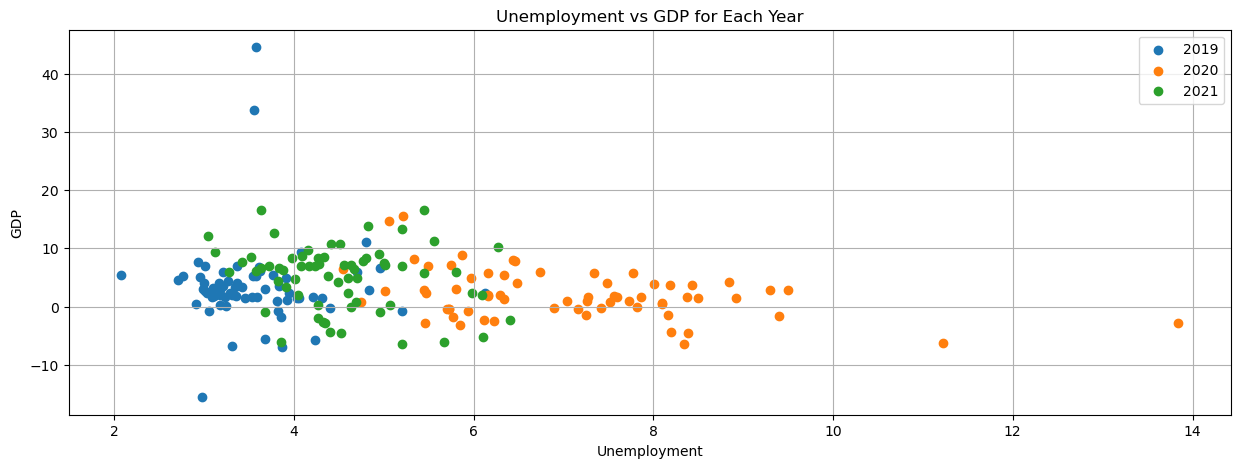

In [25]:
# Plotting GDP vs. Unemployment for each year
plt.figure(figsize=(15, 5))

# Plotting for each year
for year in ['2019', '2020', '2021']:
    plt.scatter(final_merge['Unemployment_' + year], final_merge['GDP_' + year], label=year)

# Adding labels and title
plt.xlabel('Unemployment')
plt.ylabel('GDP')
plt.title('Unemployment vs GDP for Each Year')
plt.legend()
plt.grid(True)

# Show plot
plt.show()

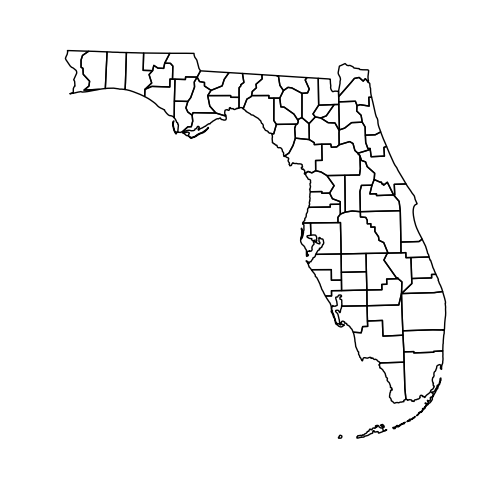

In [28]:
# Load the json file with county coordinates
geoData = gpd.read_file(
    'https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/data/US-counties.geojson'
)

# Make sure the "id" column is an integer
geoData.id = geoData['id'].astype(int)

# filter data to Florida
florida = geoData.loc[geoData['STATE']=='12']

# Basic plot with just county outlines
gplt.polyplot(
    florida,
    projection=gcrs.AlbersEqualArea()
)
plt.show()


In [29]:
#merge spatial and numerical data
full_df = florida.merge(merged_df,left_on=['NAME'],right_on=['County'])

#round unemployment index to two decimal places
full_df = full_df.round(1)

#show first five rows
full_df.head()

,id,GEO_ID,STATE,COUNTY,NAME,LSAD,CENSUSAREA,geometry,Value_2019,Value_2020,Value,GDP_Change
0,12083,0500000US12083,12,083,Marion,County,1584.5,"POLYGON ((-82.31170 28.96039, -82.42700 29.021...",1.2,4.0,7.1,1.9
1,12087,0500000US12087,12,087,Monroe,County,983.3,"MULTIPOLYGON (((-80.25058 25.34193, -80.25492 ...",5.4,-4.6,12.2,11.4
2,12095,0500000US12095,12,095,Orange,County,903.4,"POLYGON ((-81.65739 28.55312, -81.65811 28.682...",3.1,-6.2,13.4,16.5
3,12111,0500000US12111,12,111,St. Lucie,County,571.9,"POLYGON ((-80.67786 27.20599, -80.67861 27.448...",1.5,3.7,7.5,2.3
4,12119,0500000US12119,12,119,Sumter,County,546.9,"POLYGON ((-81.95419 28.96005, -81.95358 28.820...",11.1,1.6,16.6,3.9


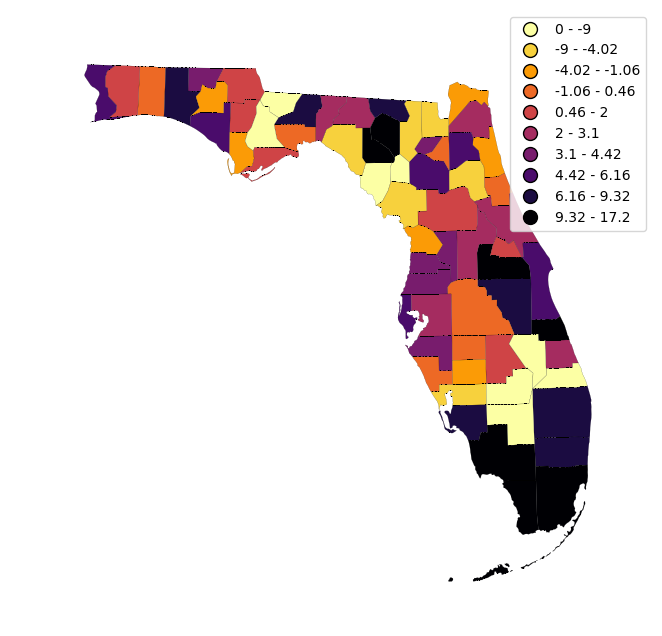

In [32]:
#color mapping with 10 colors
scheme = mc.Quantiles(full_df['GDP_Change'], k=10)

# Map
gplt.choropleth(
    full_df,
    projection=gcrs.AlbersEqualArea(),
    hue='GDP_Change',
    scheme=scheme, cmap='inferno_r',
    linewidth=.1,
    edgecolor='black',
    figsize=(12, 8),
    legend=True
)

plt.show()